# KMeans++

### First of all, let's generate some data points

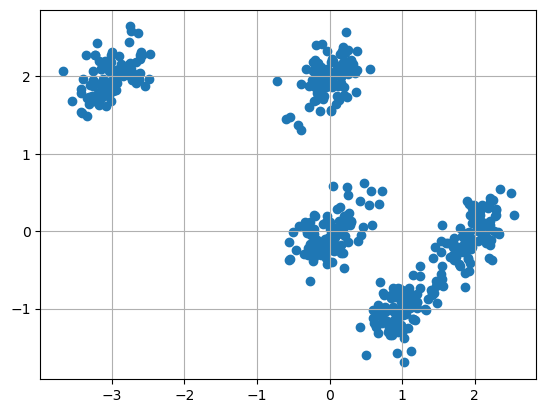

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal
from ML import KMeans

clusters = 5
n_samples = 100
n_features = 2

# Generate random positive semi-definite matrix
A = np.random.randn(2, 2) / 4
cov = A @ A.T

# Generate random means for each cluster
means = np.random.randint(low=-3, high=3, size=(clusters, 2))

# Generate samples for all clusters at once
X = np.random.multivariate_normal(np.zeros(2), cov, (clusters, n_samples))

# Add the means to each cluster's samples
X += means[:, np.newaxis, :]

# Reshape X to combine all clusters
X = X.reshape(-1, 2)

# Plot the results
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.show()

## Inheriting KMeans++ from KMeans

In [2]:
class KMeansPlusPlus(KMeans):
    """
    K-means++ clustering algorithm implementation.
    Inherits from KMeans and only changes the initialization method.
    """

    def _initialize_centroids(self, X):
        """
        Initialize cluster centroids using the K-means++ method.
        
        Args:
            X (np.ndarray): Input data of shape (n_samples, n_features).
        """
        n_samples, n_features = X.shape
        centroids = np.zeros((self.clusters, n_features))
        
        # Randomly choose the first centroid
        centroids[0] = X[np.random.randint(n_samples)]
        
        # Choose the remaining centroids
        for i in range(1, self.clusters):
            # Compute distances from points to the centroids
            distances = np.min(np.sum((X[:, np.newaxis] - centroids[:i])**2, axis=2), axis=1)
            
            # Choose the next centroid with probability proportional to distance squared
            probs = distances / distances.sum()
            cumprobs = np.cumsum(probs)
            r = np.random.rand()
            ind = np.searchsorted(cumprobs, r)
            centroids[i] = X[ind]
        
        self.centroids = centroids

### Example usage of KMeans++ with Euclidean distance

Sum of Squared Errors: 59.30570843075556


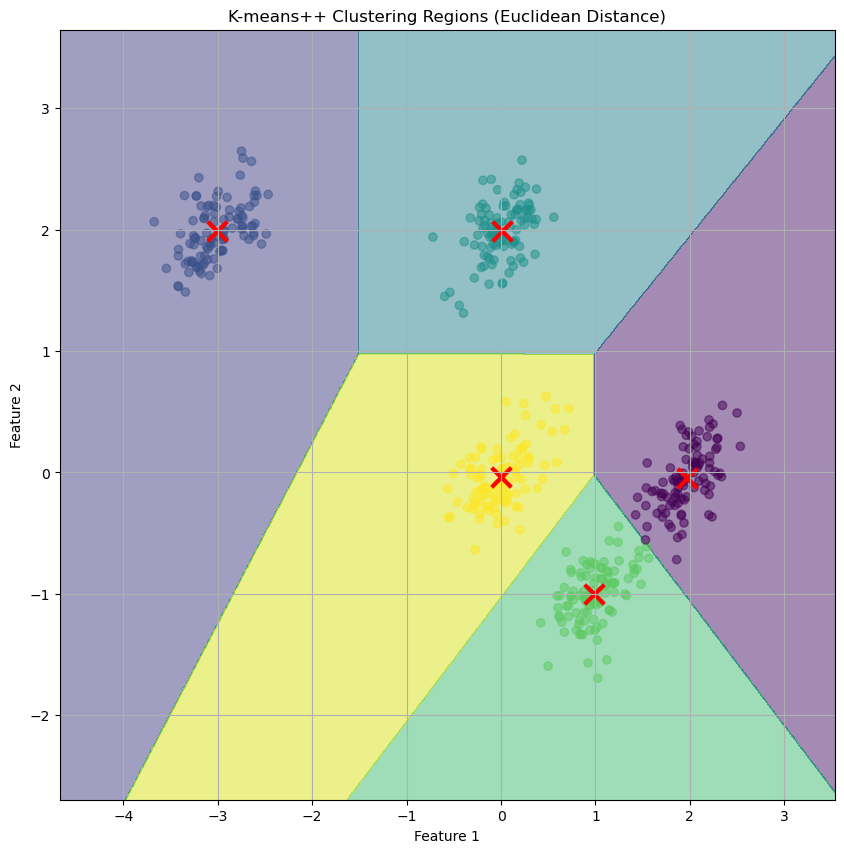

In [3]:
# Initiate and fit
kmeansplus = KMeansPlusPlus(k=5, max_iter=50, distance_type='euclidean')
kmeansplus.fit(X)

sse = kmeansplus.calculate_sse(X)
print(f"Sum of Squared Errors: {sse}")

# Create a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

# Flatten the grid to pass into predict
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict assignments for each point in the meshgrid
region_assignments = kmeansplus.predict(grid_points)

# Reshape the assignment array to match the meshgrid shape
region_assignments = region_assignments.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 10))

# Plot the regions
plt.contourf(xx, yy, region_assignments, alpha=0.5)

# Plot the centroids
plt.scatter(kmeansplus.centroids[:, 0], kmeansplus.centroids[:, 1], marker='x', color='red', s=100, linewidths=3)
# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=kmeansplus.assignments, alpha=0.5)

# Plot centroids
plt.scatter(kmeansplus.centroids[:, 0], kmeansplus.centroids[:, 1], marker='x', color='red', s=200, linewidths=3)

plt.grid(True)
plt.title('K-means++ Clustering Regions (Euclidean Distance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Example usage of KMeans++ with Manhattan distance

Sum of Squared Errors: 101.2591514392887


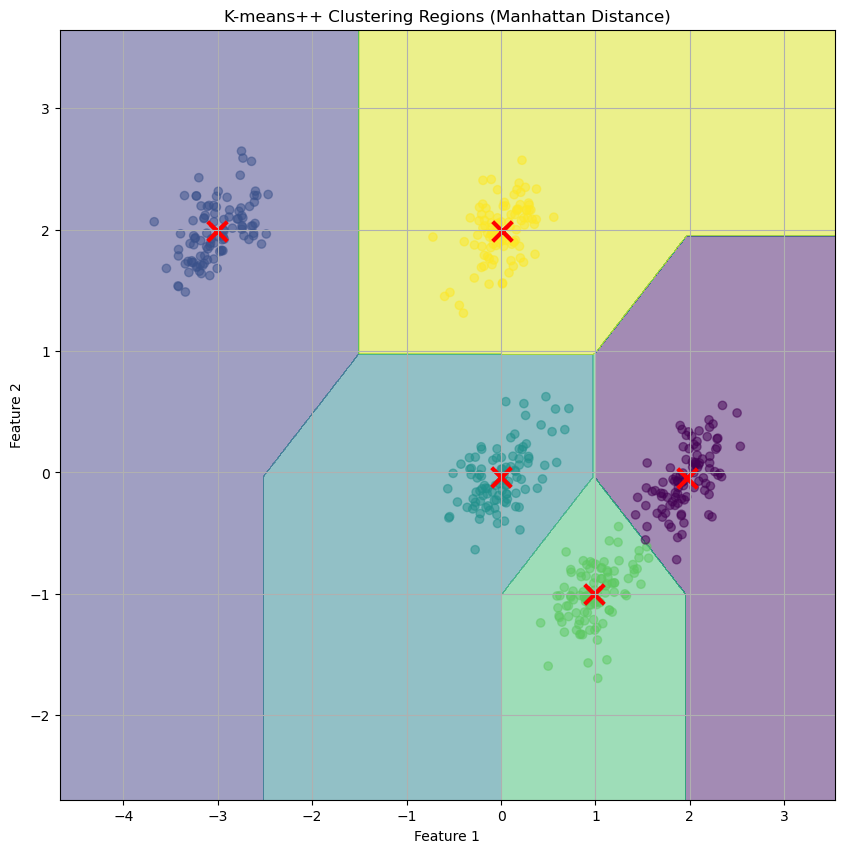

In [4]:
# Initiate and fit
kmeansplus = KMeansPlusPlus(k=5, max_iter=50, distance_type='manhattan')
kmeansplus.fit(X)

sse = kmeansplus.calculate_sse(X)
print(f"Sum of Squared Errors: {sse}")

# Predict assignments for each point in the meshgrid
region_assignments = kmeansplus.predict(grid_points)

# Reshape the assignment array to match the meshgrid shape
region_assignments = region_assignments.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 10))

# Plot the regions
plt.contourf(xx, yy, region_assignments, alpha=0.5)

# Plot the centroids
plt.scatter(kmeansplus.centroids[:, 0], kmeansplus.centroids[:, 1], marker='x', color='red', s=100, linewidths=3)
# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=kmeansplus.assignments, alpha=0.5)

# Plot centroids
plt.scatter(kmeansplus.centroids[:, 0], kmeansplus.centroids[:, 1], marker='x', color='red', s=200, linewidths=3)

plt.grid(True)
plt.title('K-means++ Clustering Regions (Manhattan Distance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Example usage of KMeans++ with Cosine distance

Sum of Squared Errors: 13.44626374168224


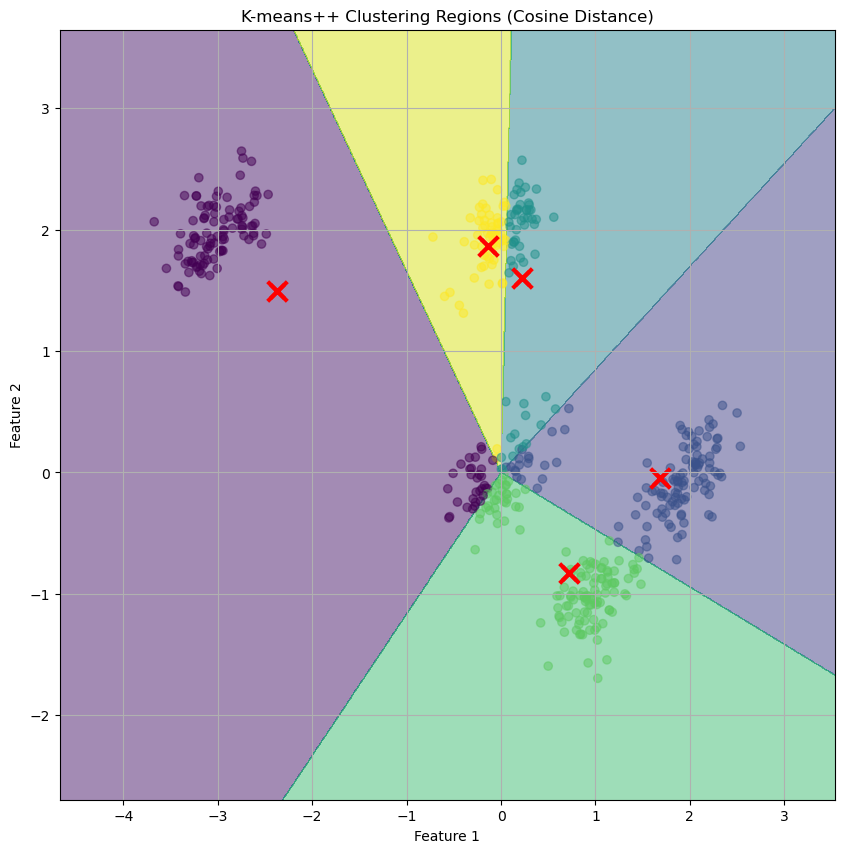

In [5]:
# Initiate and fit
kmeansplus = KMeansPlusPlus(k=5, max_iter=50, distance_type='cosine')
kmeansplus.fit(X)

sse = kmeansplus.calculate_sse(X)
print(f"Sum of Squared Errors: {sse}")

# Predict assignments for each point in the meshgrid
region_assignments = kmeansplus.predict(grid_points)

# Reshape the assignment array to match the meshgrid shape
region_assignments = region_assignments.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 10))

# Plot the regions
plt.contourf(xx, yy, region_assignments, alpha=0.5)

# Plot the centroids
plt.scatter(kmeansplus.centroids[:, 0], kmeansplus.centroids[:, 1], marker='x', color='red', s=100, linewidths=3)
# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=kmeansplus.assignments, alpha=0.5)

# Plot centroids
plt.scatter(kmeansplus.centroids[:, 0], kmeansplus.centroids[:, 1], marker='x', color='red', s=200, linewidths=3)

plt.grid(True)
plt.title('K-means++ Clustering Regions (Cosine Distance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Note that since we are re-initializing the centroids, we cannot compare the distance measures directly. Nonetheless, the graphs clearly demonstrate how each distance measure is.